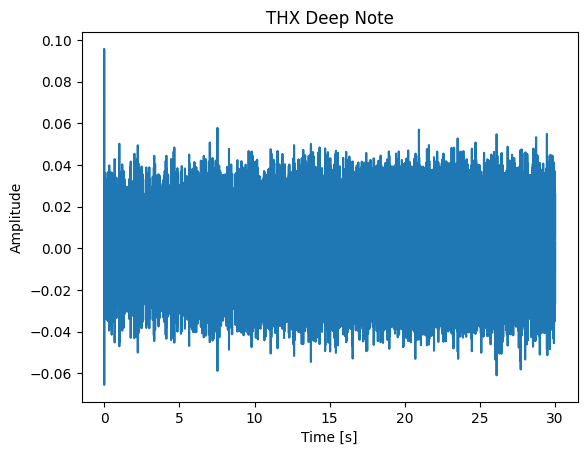

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd
from scipy.signal import chirp

# Constants
fs = 44100  # Sampling frequency
T = 30  # Duration in seconds
measure_duration = T / 8  # Duration of each measure
t = np.linspace(0, T, T * fs, False)  # Time vector

# First measure, detune to the second measure's notes
f0 = np.random.uniform(200, 400, 30)  # Random frequencies between 200 and 400 Hz
f1 = np.random.uniform(400, 800, 30)  # Random frequencies between 400 and 800 Hz
s1 = np.zeros(len(t))  # Signal
# Slide each note to the next one, louder than the previous, no linear but parabolic
for i in range(30):
    s1 += np.sin(2 * np.pi * f0[i] * t + 0.5 * (f1[i] - f0[i]) * t ** 2) / 30
s1 *= 0.1  # Very quiet

# Second measure, detune to the third measure's notes
f2 = np.random.uniform(800, 1600, 30)  # Random frequencies between 800 and 1600 Hz
s2 = np.zeros(len(t))  # Signal
# Slide each note to the next one, louder than the previous, no linear but parabolic
for i in range(30):
    s2 += np.sin(2 * np.pi * f1[i] * t + 0.5 * (f2[i] - f1[i]) * t ** 2) / 30
s2 *= 0.3  # Louder than the first

# Third measure, detune to the fourth measure's notes
f3 = np.random.uniform(1600, 3200, 30)  # Random frequencies between 1600 and 3200 Hz
s3 = np.zeros(len(t))  # Signal
# Slide each note to the next one, louder than the previous, no linear but parabolic
for i in range(30):
    s3 += np.sin(2 * np.pi * f2[i] * t + 0.5 * (f3[i] - f2[i]) * t ** 2) / 30
s3 *= 0.5  # Louder than the second

# Fourth measure, detune to the final notes. Each of the 30 notes needs to be assigned to a final note, of which there are 8.
# This is done by assigning each note to the closest final note.
final_notes = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]  # C major chord
s4 = np.zeros(len(t))  # Signal
# Slide each note to the next one, louder than the previous, no linear but parabolic
for i in range(30):
    closest_note = min(final_notes, key=lambda x: abs(x - f3[i]))
    s4 += np.sin(2 * np.pi * f3[i] * t + 0.5 * (closest_note - f3[i]) * t ** 2) / 30
s4 *= 0.7  # Louder than the third

# Fifth, sixth, seventh and eighth measures, final notes
s5 = np.zeros(len(t))  # Signal
s6 = np.zeros(len(t))  # Signal
s7 = np.zeros(len(t))  # Signal
s8 = np.zeros(len(t))  # Signal
# Slide each note to the next one, louder than the previous, no linear but parabolic
for i in range(30):
    closest_note = min(final_notes, key=lambda x: abs(x - f3[i]))
    s5 += np.sin(2 * np.pi * closest_note * t) / 30
    s6 += np.sin(2 * np.pi * closest_note * t) / 30
    s7 += np.sin(2 * np.pi * closest_note * t) / 30
    s8 += np.sin(2 * np.pi * closest_note * t) / 30
s5 *= 1  # Very loud
s6 *= 1  # Very loud
s7 *= 1  # Very loud

# Fade out the final measure
fade_out = np.linspace(1, 0, int(fs * 0.5))
s8[-len(fade_out):] *= fade_out

# Concatenate all measures
signal = np.concatenate((s1, s2, s3, s4, s5, s6, s7, s8))

# Fix signal: ValueError: x and y must have same first dimension, but have shapes (1323000,) and (10584000,)
signal = signal[:len(t)]

# Plot signal
plt.figure()
plt.plot(t, signal)
plt.title('THX Deep Note')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Play signal
sd.play(signal, fs)
sd.wait()

# Save signal
sf.write('thx_deep_note.wav', signal, fs)
